# PG RECOMMENDATION APP
## DEVELOPED BY MD SHAD KHAN

### Step 1: Import Libraries

Importing all required libraries for data handling, visualization, and machine learning.


In [32]:
# Data Handling & Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Similarity & Neighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# Clustering
from sklearn.cluster import KMeans

# Supervised ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Step 2: Load the Dataset

We’ll now load the PG dataset using pandas and take a quick look at the first few rows.


In [33]:
# Load the dataset
df = pd.read_csv("sample_pg_data.csv")

# Display the first 5 rows
df.head()


,PG_Name,Location,Price,Gender_Preference,WiFi,Food,AC,Laundry,Parking,Security,Rating,Contact,Distance_to_Metro(km)
0,StayEase PG,Pitampura,7720,Women-only,Yes,No,Yes,Yes,Yes,No,4.6,9876549788,1.3
1,CityNest,Dwarka,10667,Women-only,Yes,Yes,No,No,Yes,Yes,4.9,9876543553,2.3
2,Elite Rooms,Pitampura,12927,Men-only,No,Yes,No,Yes,Yes,Yes,4.6,9876562534,2.1
3,CityNest,Gurugram Sector 14,6822,Unisex,Yes,Yes,Yes,Yes,Yes,No,4.7,9876533794,2.6
4,BudgetStay,Rohini,11667,Unisex,Yes,Yes,Yes,Yes,No,No,4.0,9876576773,4.1


### Step 3: Basic Data Overview

Let’s check the shape of the dataset, data types, summary statistics, and any missing values.


In [34]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Column data types and non-null counts
print("\nDataset Info:")
print(df.info())

# Summary statistics for numeric and categorical columns
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Shape of dataset: (200, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PG_Name                200 non-null    object 
 1   Location               200 non-null    object 
 2   Price                  200 non-null    int64  
 3   Gender_Preference      200 non-null    object 
 4   WiFi                   200 non-null    object 
 5   Food                   200 non-null    object 
 6   AC                     200 non-null    object 
 7   Laundry                200 non-null    object 
 8   Parking                200 non-null    object 
 9   Security               200 non-null    object 
 10  Rating                 200 non-null    float64
 11  Contact                200 non-null    int64  
 12  Distance_to_Metro(km)  200 non-null    float64
dtypes: float64(2), int64(2), object(9)
memory usage: 20.4+ KB
None

Sum

### Step 4: Exploratory Data Analysis (EDA)

Now we’ll explore the dataset to understand the distribution of features, relationships between variables, and patterns in the data.


In [35]:
# Check unique values in each column (especially for categorical ones)
print("Unique values per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column:

PG_Name: 10
Location: 10
Price: 199
Gender_Preference: 3
WiFi: 2
Food: 2
AC: 2
Laundry: 2
Parking: 2
Security: 2
Rating: 21
Contact: 199
Distance_to_Metro(km): 48


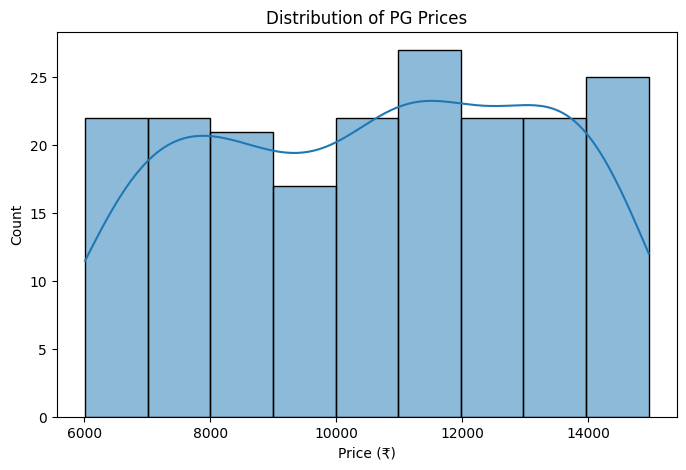

In [36]:
# Plot distribution of price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of PG Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.show()

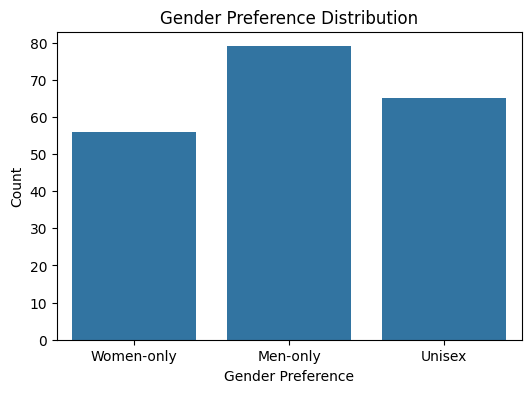

In [37]:
# Countplot for Gender Preference
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender_Preference', data=df)
plt.title("Gender Preference Distribution")
plt.xlabel("Gender Preference")
plt.ylabel("Count")
plt.show()

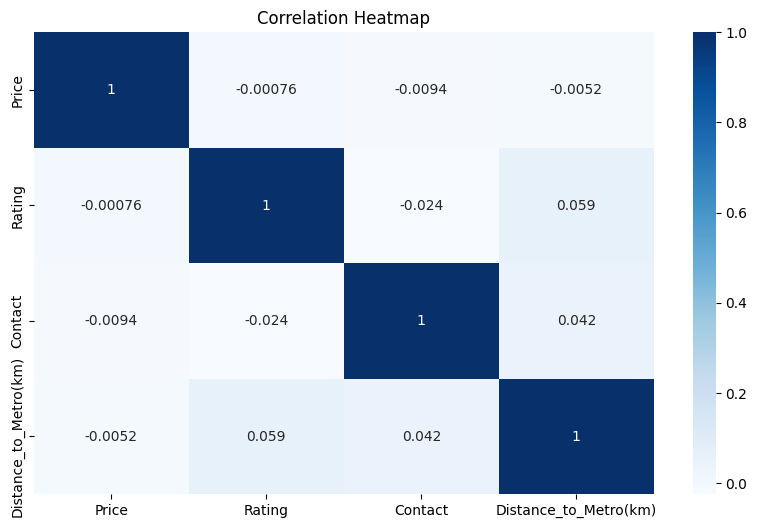

In [38]:
# Correlation heatmap (for numeric features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

### Step 5: Data Preprocessing

In this step, we handle categorical variables, encode binary features, scale numerical data, and prepare the dataset for machine learning models.


In [39]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib
import os

# Copy original dataset for processing
data = df.copy()

# Create folder for encoders
os.makedirs('encoders', exist_ok=True)

# Encode binary categorical columns (Yes/No → 1/0)
binary_cols = ['WiFi', 'Food', 'AC', 'Laundry', 'Parking', 'Security']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Save binary mapping for consistency (optional)
joblib.dump({'Yes': 1, 'No': 0}, 'encoders/binary_mapping.pkl')

# Encode Gender_Preference using LabelEncoder and save
le_gender = LabelEncoder()
data['Gender_Preference'] = le_gender.fit_transform(data['Gender_Preference'])
joblib.dump(le_gender, 'encoders/Gender_Preference_encoder.pkl')

# Encode Location using LabelEncoder and save
le_location = LabelEncoder()
data['Location'] = le_location.fit_transform(data['Location'])
joblib.dump(le_location, 'encoders/Location_encoder.pkl')

# Drop non-useful columns for model input
data_model = data.drop(['PG_Name', 'Contact'], axis=1)

# Scale numeric features and save the scaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_model), columns=data_model.columns)
joblib.dump(scaler, 'encoders/scaler.pkl')

# Final look
data_scaled.head()



,Location,Price,Gender_Preference,WiFi,Food,AC,Laundry,Parking,Security,Rating,Distance_to_Metro(km)
0,0.666667,0.190748,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.80,0.229167
1,0.222222,0.520058,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.95,0.437500
2,0.666667,0.772600,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.80,0.395833
3,0.333333,0.090401,0.5,1.0,1.0,1.0,1.0,1.0,0.0,0.85,0.500000
4,0.777778,0.631802,0.5,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.812500


### Step 6: Choosing Recommendation Technique

We’ll use a **content-based filtering approach** that recommends PGs similar to user preferences using cosine similarity. This works well when we have PG features but no past user interaction data.


In [40]:
# Calculate cosine similarity matrix
similarity = cosine_similarity(data_scaled)

# Create a function to recommend similar PGs
def recommend_pg(index, top_n=5):
    print(f"\nPG Selected: {df.iloc[index]['PG_Name']}")
    print("Top Recommended PGs:")
    
    # Get similarity scores
    sim_scores = list(enumerate(similarity[index]))
    
    # Sort based on similarity scores (excluding the same PG)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    for i, score in sim_scores:
        print(f"{df.iloc[i]['PG_Name']} (Score: {round(score, 2)}) — ₹{df.iloc[i]['Price']} | {df.iloc[i]['Location']}")

# Try recommending PGs similar to the 0th PG in the dataset
recommend_pg(0)



PG Selected: StayEase PG
Top Recommended PGs:
Cosy Homes (Score: 0.93) — ₹6348 | Connaught Place
CityNest (Score: 0.93) — ₹7045 | Gurugram Sector 14
StayEase PG (Score: 0.93) — ₹11013 | Rohini
Elite Rooms (Score: 0.91) — ₹8296 | Connaught Place
BudgetStay (Score: 0.9) — ₹9448 | Rohini


### Step 7: (Optional) Price Prediction Model

In this step, we build a regression model to predict the price of a PG based on its features, such as location, amenities, and gender preference. This can enhance the recommendation system by providing price-based ranking.


In [41]:
# Prepare data for regression (predicting 'Price')
X = data_scaled.drop('Price', axis=1)  # Features
y = data['Price']  # Target (Price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict prices for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 2352.65225
Mean Squared Error: 7601914.8584875
Root Mean Squared Error: 2757.1570246337983
R2 Score: -0.1814894348892917


In [42]:
import joblib

# Replace `model` with your actual model variable name
joblib.dump(model, 'pg_model.pkl')


['pg_model.pkl']